In [1]:
from image_classification_simulation.models.vit_baseline import ViT
from image_classification_simulation.data.office31_loader import Office31Loader
import torch
import matplotlib.pyplot as plt

In [2]:
hparams = {
    "loss": "CrossEntropyLoss",
    "batch_size": 16,
    "optimizer": "adamW",
    "num_classes": 31,
    "lr": 0.0003,
    "max_epoch": 2,
    "data": "Office31",
    "num_channels": 3,
    "seed": 1234
}

Feature batch shape: torch.Size([16, 3, 300, 300])
Labels batch shape: torch.Size([16])


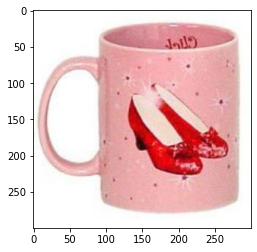

Label: 17


In [3]:
office31_loader = Office31Loader("../examples/data/domain_adaptation_images/amazon/images", hparams)
office31_loader.setup(stage="fit")
train_dl=office31_loader.train_dataloader()
val_dl=office31_loader.val_dataloader()

train_features, train_labels = next(iter(train_dl))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
img = img.permute(1, 2, 0)
label = train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {label}")


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ViT(hparams).to(device)
#print(model)

print("Input img batch shape: ",train_features.shape)
print("Labels batch shape: ",train_labels.shape)
loss = model.training_step((train_features, train_labels), None)
print(loss)

forward_output = model.forward(train_features)
print("Forward output shape: ", forward_output.shape)
print("Forward output: ", forward_output)


Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Input img batch shape:  torch.Size([16, 3, 300, 300])
Labels batch shape:  torch.Size([16])
post feature extractor shape:  torch.Size([3, 300, 300])
post feature extractor shape:  torch.Size([3, 224, 224])
{'loss': tensor(55.1247, grad_fn=<NllLossBackward0>), 'acc': 0.0}
post feature extractor shape:  torch.Size([3, 300, 300])
post feature extractor shape:  torch.Size([3, 224, 224])
Forward output shape:  torch.Size([16, 31])
Forward output:  tensor([[ 5.1494e-03, -2.0948e-02,  1.5739e-01,  1.0846e-01, -6.5183e-02,
          2.3741e-02, -6.0768e-02, -3.7527e-02,  9.0745e-02,  2.0568e-02,
         -1.1197e-01,  9.6237e-03, -6.7164e-02,  1.4294e-01, -5.7709e-02,
          1.5025e-02,  6.6284e-02,  5.0004e-02, -5.0071e-02,  3.9813e-02,
         -8.8002e-02,  1.1854e-01, -6.2969e-03,  9.9027e-02,  1.0645e-02,
         -1.0488e-01, -3.8624e-02, -9.2138e-02,  3.1419e-02, -1.3841e-02,
          4.5422e-04],
        [-8.9617e-02, -1.7522e-01, -8.8982e-02, -8.2773e-02, -5.5906e-02,
         -3.